# HW5: Prob 1: Create a 2D embedding of the CIFAR-10 comparing different manifold learning algorithms

The [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) is not that unlike the MNIST data set in that it is is 6K instances of small images. Unlike MNIST they are color images which are 32x32x3 (32 pixels wide, 32 pixels high, 3 color channels). The 3 color channels are red, green and blue. Each pixel is represented by a number between 0 and 255. The data set is divided into 10 classes. The classes are airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck. The data set is available in the keras.datasets module. You can load it with the following code:

```python
from torchvision.datasets import CIFAR10
dataset = CIFAR10(root='data/', download=True, transform=ToTensor())
test_dataset = CIFAR10(root='data/', train=False, transform=ToTensor())
```

Your goal is to compare different manifold learning algorithms on this data set. You should use the following algorithms:

* Principle Component Analysis
* Isomap Embedding
* Locally Linear Embedding
* Multidimensional scaling.
* SpectralEmbedding
* T-distributed Stochastic Neighbor Embedding

All of these algorithms are available in the sklearn library. In addition you should use also try the UMAP algorithm which is available for python as a library [umap](https://umap-learn.readthedocs.io/en/latest/basic_usage.html). In each of these cases you should project the data into 2D and color the data by the class in which it belongs.

Two references which might help the [sklearn documentation](https://scikit-learn.org/stable/modules/manifold.html) and Jake Vanderplas' book [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html). 

Practice creating a well formatted Jupyter notebook. You should have a title, a description of the data set, a description of the algorithms, a description of the results, and a discussion of the results. You should also have a conclusion. Your notebook should not have lots of code cells with no explanation. It should also not have lots of text outputs. You may need that during your development but by the time you submit, please clean it up.


In [1]:
!pip install torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 39.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 2.4 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: torch
    Found existing installation: torch 2.2.1
    Uninstalling torch-2.2.1:
      Successfully uninstalled torch-2.2.1


In [15]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
from sklearn.manifold import Isomap, LocallyLinearEmbedding, MDS, SpectralEmbedding, TSNE


## Data loading
The CIFAR-10 dataset is loaded from the torchvisison library

In [4]:
#load the dataset
dataset = CIFAR10(root='data/', download=True, transform=ToTensor())

#Extract the data and labels
data=np.array([dataset[i][0].numpy().flatten() for i in range(len(dataset))])
label=np.array([dataset[i][1] for i in range (len(dataset))])

#Select the subset data to work with
sample_num=1000
indices=np.random.choice(len(data), sample_num, replace=False)
subset=data[indices]
subset_label=label[indices]

Files already downloaded and verified


In [13]:
#create function for 2D embedding
def embedding_plot(embedding, label, title):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=label, cmap='tab10', alpha=0.5)
    plt.legend(handles=scatter.legend_elements()[0], labels=[dataset.classes[i] for i in range(10)])
    plt.title(title)
    plt.show()



Time to implement and visualize the manifold learning algorithms listed in the problem i.e:
PCA
Isomap
Multidimensional Scaling
t-SNE
UMAP


## PCA
This is a linear dimensionlity reduction technique the projects data to the directions of maximum variance.

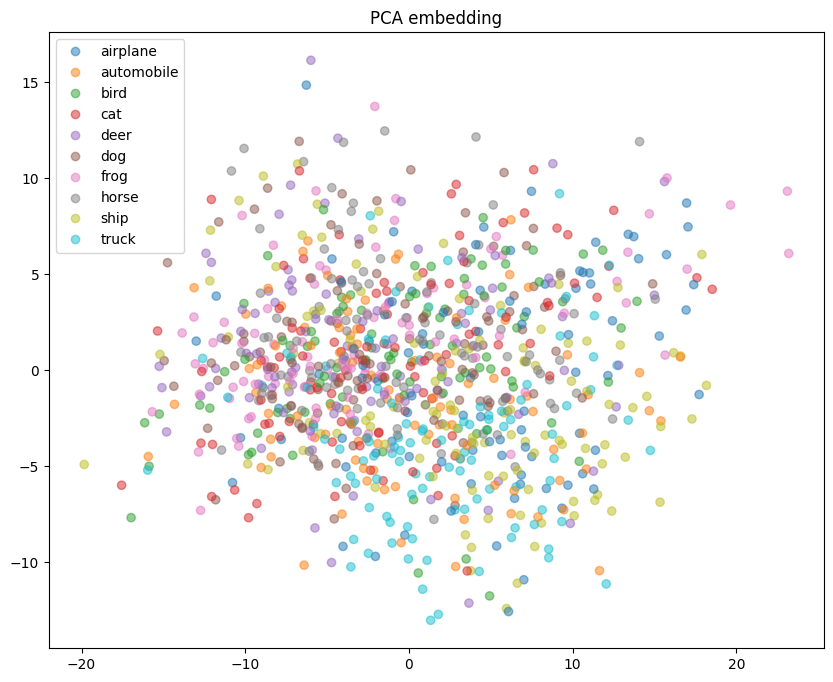

In [14]:
pca=PCA(n_components=2)
pca_embedding= pca.fit_transform(subset)
embedding_plot(pca_embedding, subset_label, 'PCA embedding')

## Isomap embedding
It is a non-linear dimensionality reduction technique used for embedding high-dimensional data into a lower-dimensional space while preserving the intrinsic geometric structure of the data.

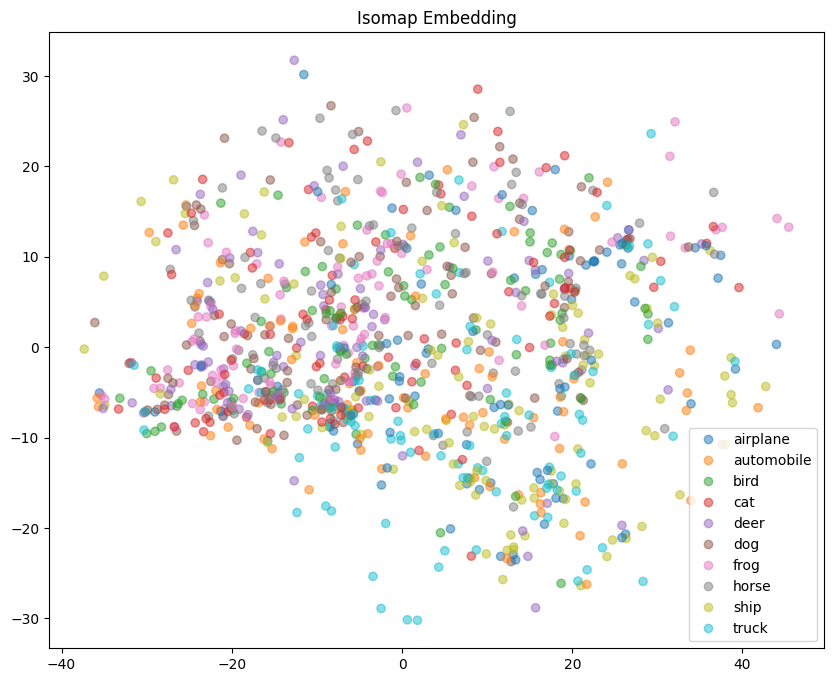

In [16]:
isomap= Isomap(n_components=2)
iso_embedding=isomap.fit_transform(subset)
embedding_plot(iso_embedding, subset_label, "Isomap Embedding")

## Locally Linear Embedding
Locally Linear Embedding, is another nonlinear dimensionality reduction technique, similar to Isomap. It aims to preserve the local relationships between data points in the high-dimensional space when embedding them into a lower-dimensional space. LLE is particularly effective for capturing the intrinsic structure of the data when it lies on a manifold or nonlinear subspace.

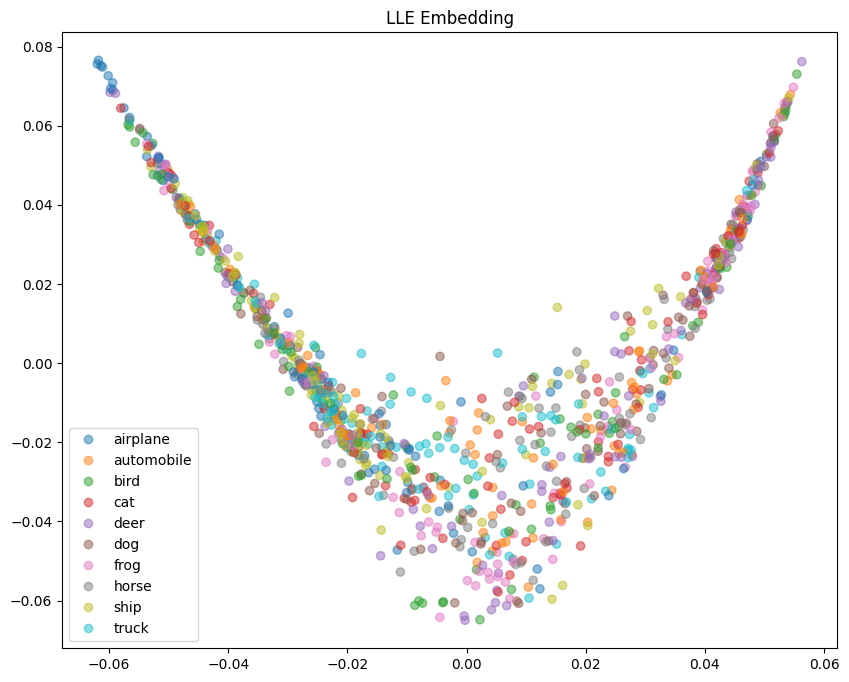

In [17]:
LLE= LocallyLinearEmbedding(n_components=2)
LLE_embedding=LLE.fit_transform(subset)
embedding_plot(LLE_embedding, subset_label, "LLE Embedding")

## Multidimensional Scaling
Unlike some other methods like Isomap or LLE, MDS is a linear technique that aims to preserve the pairwise distances between data points as much as possible when embedding them into a lower-dimensional space.

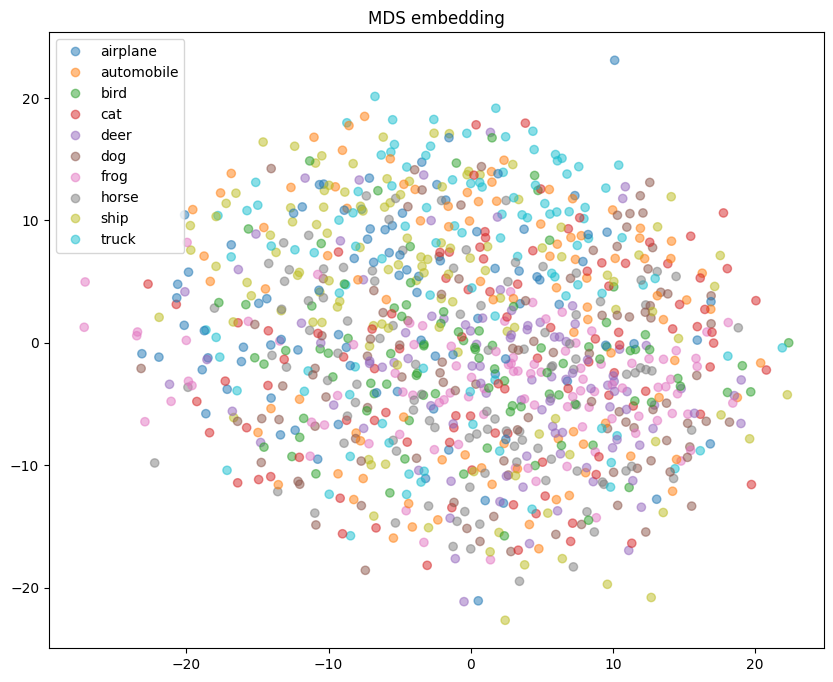

In [18]:
mds=MDS(n_components=2)
mds_embedding=mds.fit_transform(subset)
embedding_plot(mds_embedding, subset_label, "MDS embedding")

## Spectral Embedding
Spectral embedding is a technique commonly used for nonlinear dimensionality reduction and clustering. It uses the spectral properties of an affinity matrix computed from the data to embed the data points into a lower-dimensional space. It is widely used in various fields such as machine learning, computer vision, natural language processing etc

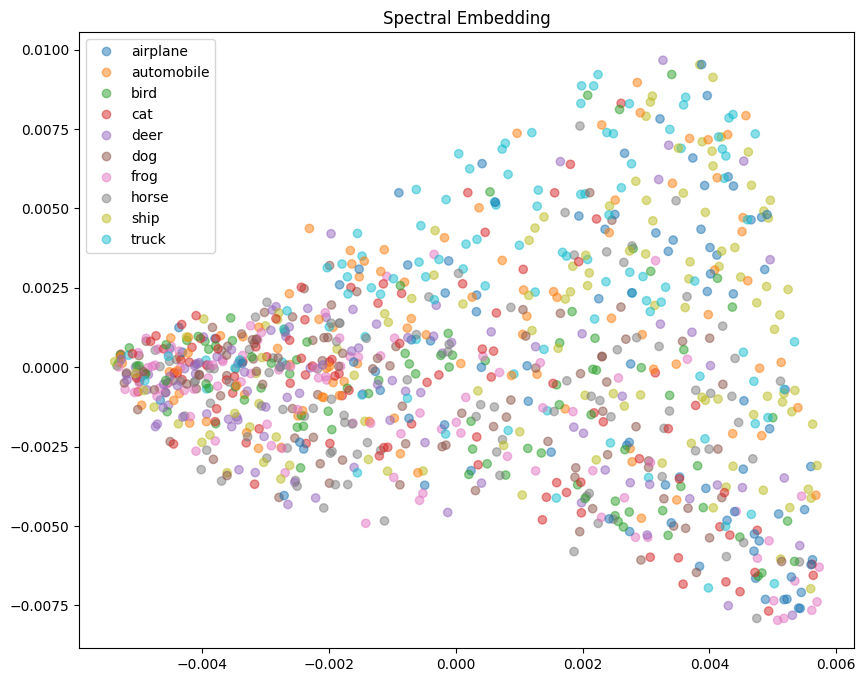

In [19]:
sp=SpectralEmbedding(n_components=2)
sp_embedding=sp.fit_transform(subset)
embedding_plot(sp_embedding, subset_label, "Spectral Embedding")

## TSNE
TSNE It is particularly effective at capturing the local and global structure of the data, making it popular for exploratory data analysis and visualization tasks.

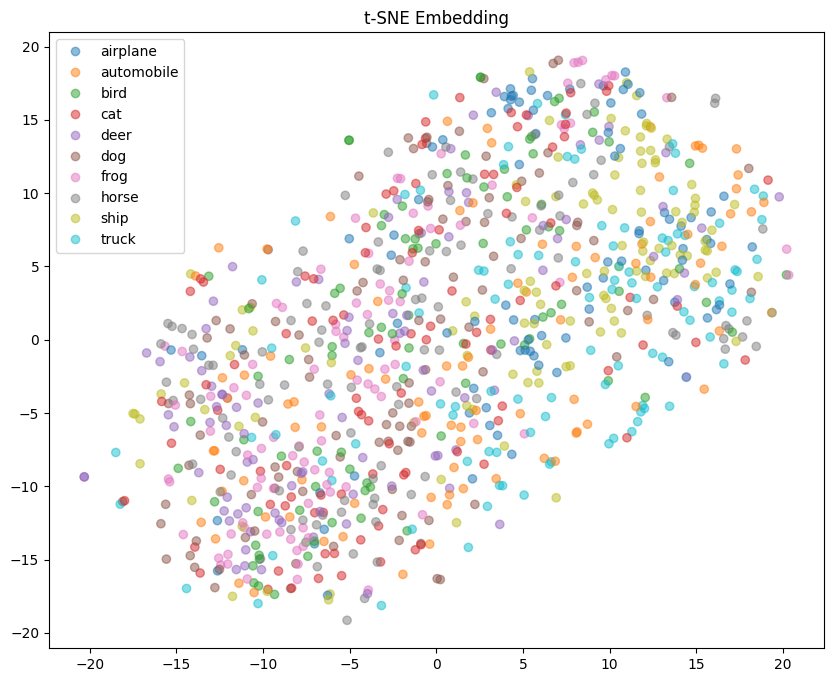

In [21]:
tnse=TSNE(n_components=2)
tnse_embedding=tnse.fit_transform(subset)
embedding_plot(tnse_embedding, subset_label, "t-SNE Embedding")

## UMAP
Uniform Manifold Approximation and Projection, is a nonlinear dimensionality reduction technique that has gained popularity for its effectiveness in preserving both local and global structures of high-dimensional data. UMAP is particularly known for its scalability, flexibility, and ability to capture complex relationships in the data.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.1 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 30.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 MB 15.5 MB/s eta 0:00:0000:0100:01


/usr/local/python/3.10.13/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


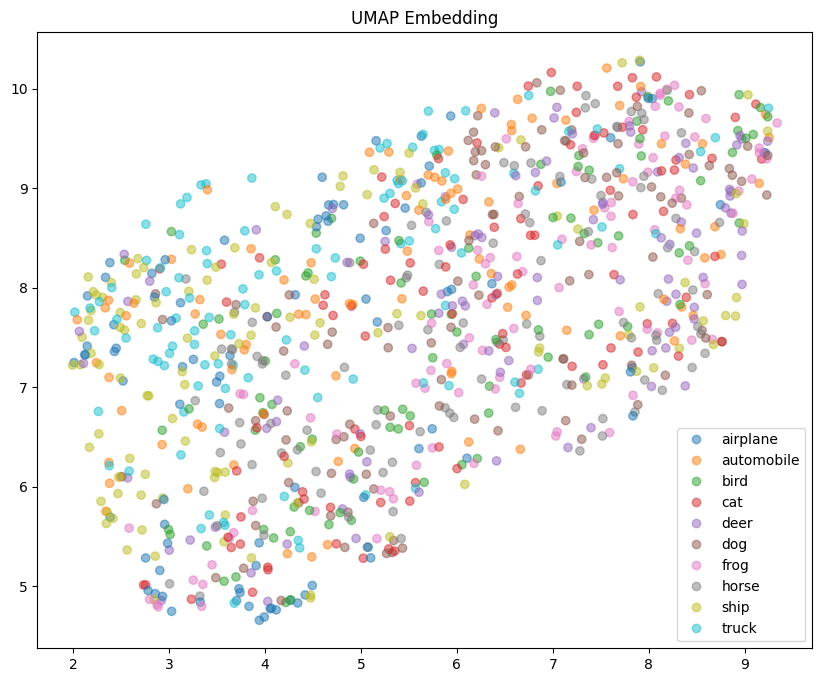

In [22]:
!pip install umap-learn
from umap import UMAP
umap=UMAP(n_components=2)
umap_embedding=umap.fit_transform(subset)
embedding_plot(umap_embedding, subset_label, "UMAP Embedding")